In [1]:
import pandas as pd
import DB as db

In [ ]:
df = pd.read_csv('.\\out\\log_df.csv')
df.head(10)

In [ ]:
pd.to_datetime(df['log_date']).dt.date  
# pd.Timestamp(df['log_date'])
# x.dt.date
# x.week
# y

In [17]:
# x = df[['token', 'line_no']].fillna('x').\
#         groupby(['token'],as_index = False).count().sort_values(by='line_no', ascending=False)
# x 

# # x.pivot(index = ['error_categ'], columns = ['service'], values=['line_no']).fillna(0).\
# #            groupby(['service','error_categ'],as_index = False).count()
# # x


conn, cursor = db.open_db()
cmd = """
select * from 
(select dt, sum(line_no) '# logins' from log_stats where token = 'Login Success' group by dt)
left join
(select dt, sum(line_no) '# email quota errors' from log_stats where token = 'MailSendException' group by dt)
using (dt)
"""
df = pd.read_sql(cmd, conn)
cursor.close()


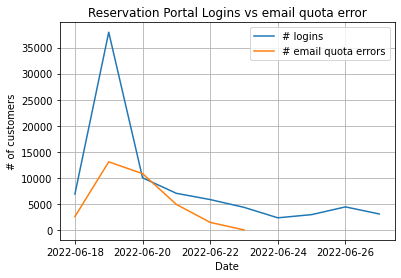

In [21]:
fig = df.plot(x='dt', y=['# logins', '# email quota errors'], title = 'Reservation Portal Logins vs email quota error', grid=True,
xlabel = 'Date', ylabel = '# of customers').get_figure()

fig.savefig(r'.\out\email quota.jpg')

In [28]:
stats_all.columns

Index(['index', 'dt', 'token', 'categ', 'line_no'], dtype='object')

In [42]:
logins = stats_all[stats_all.token == 'Login Success']
logins.rename({'line_no':'# logins'}, inplace= True)
emails_errors = stats_all[stats_all.token == 'MailSendException']
emails_errors.rename({'line_no':'# email sending failiure'}, inplace= True)
plt_data = pd.concat([logins, emails_errors], axis = 'columns', keys=['dt'])
plt_data
# plt_data.plot(x='dt')

C:\Users\yahia\AppData\Local\Temp\ipykernel_8516\3757649794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logins.rename({'line_no':'# logins'}, inplace= True)
C:\Users\yahia\AppData\Local\Temp\ipykernel_8516\3757649794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails_errors.rename({'line_no':'# email sending failiure'}, inplace= True)


dt                                         
   index          dt          token categ line_no
1      3  2022-06-18  Login Success  user    6907
8     15  2022-06-19  Login Success  user   37926
15    27  2022-06-20  Login Success  user   10022
21    42  2022-06-21  Login Success  user    7044
28    55  2022-06-22  Login Success  user    5846
34    67  2022-06-23  Login Success  user    4356
41    80  2022-06-24  Login Success  user    2347
46    90  2022-06-25  Login Success  user    2961
51   100  2022-06-26  Login Success  user     998

<AxesSubplot:xlabel='dt'>

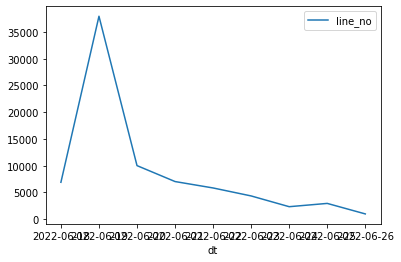

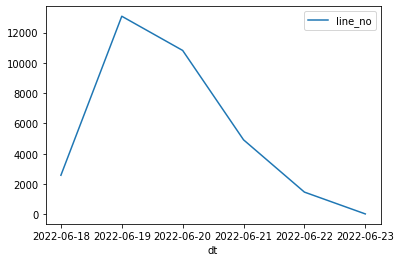

In [37]:
# stats
# stats = pd.DataFrame()
# stats = stats_all[['dt', 'line_no']]
# stats['login'] = 
# stats_all[['dt', 'line_no']].loc[[stats_all['token'] == 'Login Success']]
# stats_all[stats_all['token'] == 'Login Success']
# stats['eMail Send Quota'] = stats_all[stats_all.token == 'MailSendException']
# stats['dt'] = stats_all.dt
stats_all[stats_all.token == 'Login Success'].plot(x='dt', y='line_no')
stats_all[stats_all.token == 'MailSendException'].plot(x='dt', y='line_no')
# stats.plot(x='dt', y='line_no')
# stats


In [8]:
import json
s = '{"datetime":"2022_06_18_00_00_31_06AM","nid":"Ù¢Ù¥Ù©Ù Ù§Ù Ù§Ù¢Ù¥Ù Ù¡Ù¦Ù¥Ù©","Country":"EG","Address":"156.209.129.10, 156.209.129.10",  "service":"login", "success":false}'
res = json.loads(s)
res

{'datetime': '2022_06_18_00_00_31_06AM',
 'nid': 'Ù¢Ù¥Ù©Ù\xa0Ù§Ù\xa0Ù§Ù¢Ù¥Ù\xa0Ù¡Ù¦Ù¥Ù©',
 'Country': 'EG',
 'Address': '156.209.129.10, 156.209.129.10',
 'service': 'login',
 'success': False}